# DS-SF-23 | Lab 16 | Walmart Sales Data | Answer Key

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn import metrics

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In this lab, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:
- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

## Loading the data and setting the DateTimeIndex

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'walmart.csv'))

df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)

df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


> ## Question 1.  Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [3]:
# Filter to store 1 sales and average over weeks

df = df[df.Store == 1][['Weekly_Sales']].resample('W').sum()
df.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


> ## Question 2.  Plot the rolling_mean for `Weekly_Sales`.  What general trends do you observe?

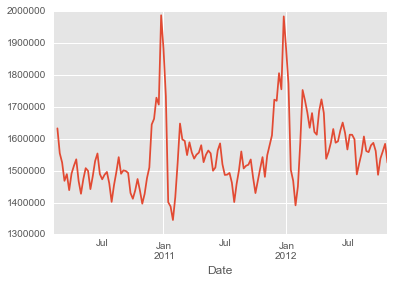

In [4]:
df.Weekly_Sales.rolling(window = 3).mean().plot()

> ## Question 3.  Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.  Comments?

In [5]:
print('Autocorrelation 1: ', df.Weekly_Sales.autocorr(1))
print('Autocorrelation 3: ', df.Weekly_Sales.autocorr(3))
print('Autocorrelation 52: ', df.Weekly_Sales.autocorr(52))

('Autocorrelation 1: ', 0.30215827941131262)
('Autocorrelation 3: ', 0.05979923506671702)
('Autocorrelation 52: ', 0.8953760294777009)


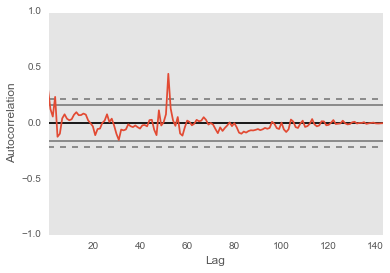

In [6]:
pd.tools.plotting.autocorrelation_plot(df.Weekly_Sales)

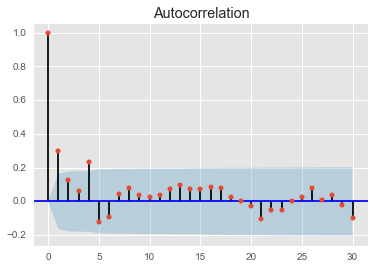

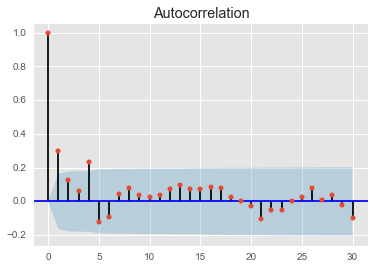

In [7]:
plot_acf(df.Weekly_Sales, lags = 30)

Answer:

- Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
- In the plot above notice, spike at around 52 - implying a yearly pattern as well
- No random spikes, probably not much use for a moving average model

> ## Question 4.  Split the weekly sales data in a training and test set - using 75% of the data for training.

In [8]:
n = len(df.Weekly_Sales)
m = int(.75 * n)

train = df.Weekly_Sales[:m]
test = df.Weekly_Sales[m:]

> ## Question 5.  Create an `AR(1)` model on the training data and compute the mean absolute error of the predictions.

In [9]:
model = sm.tsa.arima_model.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic = True
)

print('Mean absolute error: ', metrics.mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 81839.338631623992)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood               -1434.663
Method:                       css-mle   S.D. of innovations         160916.939
Date:                                   AIC                           2875.327
Time:                                   BIC                           2883.345
Sample:                    02-07-2010   HQIC                          2878.577
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.26e+04     68.293      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.3147      0.093      3.399      0.001         0.133     0.496
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1779           +0.0000j            3.1779            0.0000
-----------------------------------------------------------------------------
"""

> ## Question 6.  Plot the residuals.  Where are their significant errors?

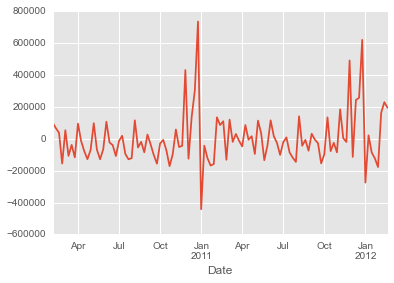

In [10]:
model.resid.plot()

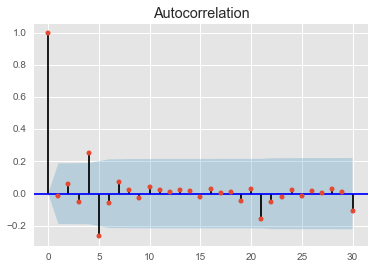

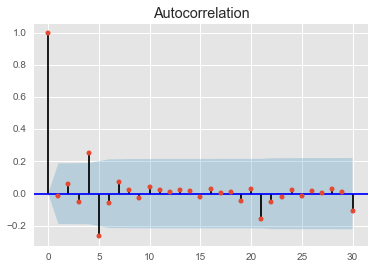

In [11]:
plot_acf(model.resid, lags = 30)

> ## Question 7.  Compute an `AR(2)` model and an `ARMA(2, 2)` model - does this improve your mean absolute error on the held out set?

In [12]:
model = sm.tsa.arima_model.ARIMA(train, (2, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic = True
)

print('Mean absolute error: ', metrics.mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 81203.239354419798)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                                   AIC                           2876.963
Time:                                   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003         0.108     0.487
ar.L2.Weekly_Sales     0.0589      0.098      0.603      0.548        -0.132     0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3080           +0.0000j            2.3080            0.0000
AR.2           -7.3588           +0.0000j            7.3588            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model = sm.tsa.arima_model.ARIMA(train, (2, 0, 2)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic = True, 
)

print('Mean absolute error: ', metrics.mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 80503.880069611521)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144102.731
Date:                                   AIC                           2863.563
Time:                                   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.320      0.000      1.51e+06  1.58e+06
ar.L1.Weekly_Sales    -1.0398      0.090    -11.583      0.000        -1.216    -0.864
ar.L2.Weekly_Sales    -0.4701      0.087     -5.380      0.000        -0.641    -0.299
ma.L1.Weekly_Sales     1.4692      0.058     25.384      0.000         1.356     1.583
ma.L2.Weekly_Sales     0.9999      0.074     13.532      0.000         0.855     1.145
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1059           -0.9509j            1.4585           -0.3870
AR.2           -1.1059           +0.9509j            1.4585            0.3870
MA.1           -0.7347           -0.6785j            1.0000           -0.3813
MA.2           -0.7347           +0.6785j            1.0000            0.3813
-----------------------------------------------------------------------------
"""

> ## Question 8.  Finally, compute an `ARIMA` model to improve your prediction error.

In [14]:
model = sm.tsa.arima_model.ARIMA(train, (2, 1, 3)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic = False, 
    typ = 'levels'
)

print('Mean absolute error: ', metrics.mean_absolute_error(test, predictions))

model.summary()

('Mean absolute error: ', 77790.369683289304)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Weekly_Sales   No. Observations:                  106
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1413.623
Method:                       css-mle   S.D. of innovations         142957.962
Date:                                   AIC                           2841.245
Time:                                   BIC                           2859.890
Sample:                    02-14-2010   HQIC                          2848.802
                         - 02-19-2012                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  576.8090    622.130      0.927      0.356      -642.544  1796.162
ar.L1.D.Weekly_Sales    -1.0485      0.090    -11.609      0.000        -1.225    -0.871
ar.L2.D.Weekly_Sales    -0.4787      0.088     -5.451      0.000        -0.651    -0.307
ma.L1.D.Weekly_Sales     0.4695      0.118      3.992      0.000         0.239     0.700
ma.L2.D.Weekly_Sales    -0.4692      0.155     -3.028      0.003        -0.773    -0.165
ma.L3.D.Weekly_Sales    -0.9996      0.125     -7.992      0.000        -1.245    -0.754
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0952           -0.9432j            1.4454           -0.3868
AR.2           -1.0952           +0.9432j            1.4454            0.3868
MA.1            1.0002           -0.0000j            1.0002           -0.0000
MA.2           -0.7348           -0.6784j            1.0001           -0.3813
MA.3           -0.7348           +0.6784j            1.0001            0.3813
-----------------------------------------------------------------------------
"""